In [1]:
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split

from sklearn import metrics

In [2]:
pima = pd.read_csv('../Data/diabetes.csv')

In [4]:
feature_Cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

feature = pima[feature_Cols]
label = pima['Outcome']

In [5]:
feature_train, feature_test, label_train, label_test = train_test_split(feature, label, test_size = 0.3, random_state = 1)

In [6]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [8]:
clf = clf.fit(feature_train, label_train)

In [9]:
label_pred = clf.predict(feature_test)

In [10]:
metrics.accuracy_score(label_pred,label_test)

0.7705627705627706

In [13]:
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

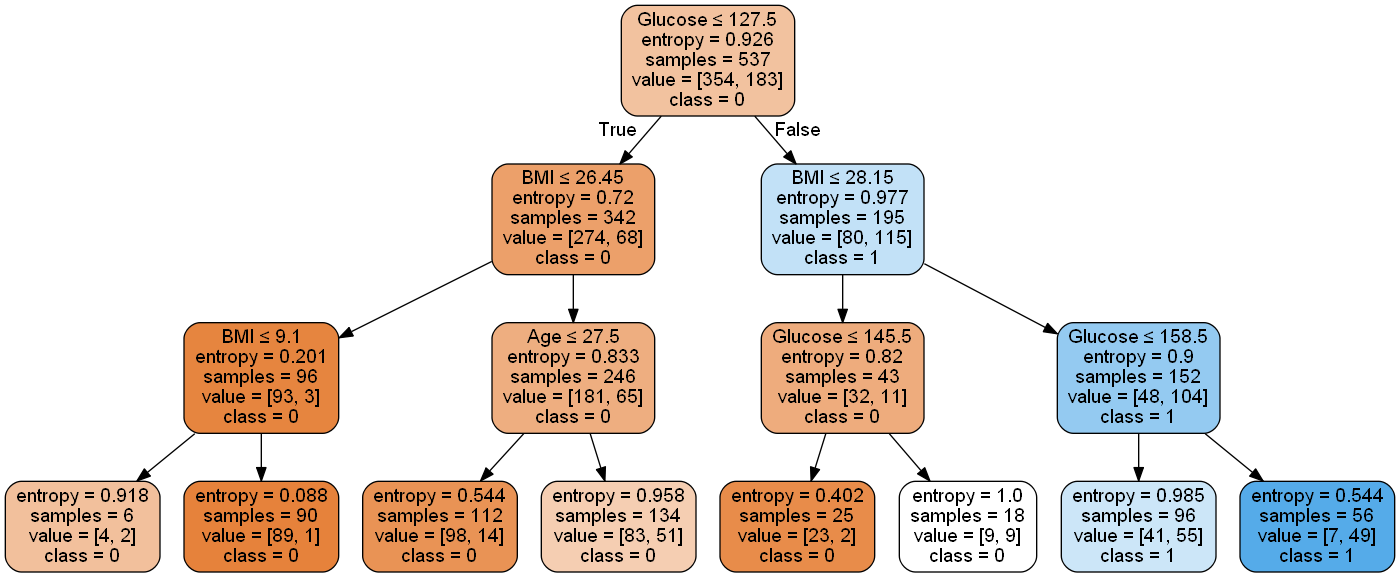

In [14]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_Cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [17]:
from sklearn.metrics import confusion_matrix 

print("Confusion Matrix: ", 
        confusion_matrix(label_pred,label_test))

Confusion Matrix:  [[124  31]
 [ 22  54]]


In [18]:
from sklearn.metrics import classification_report

print("cls_report:", classification_report(label_pred, label_test))

cls_report:               precision    recall  f1-score   support

           0       0.85      0.80      0.82       155
           1       0.64      0.71      0.67        76

   micro avg       0.77      0.77      0.77       231
   macro avg       0.74      0.76      0.75       231
weighted avg       0.78      0.77      0.77       231

